In [1]:
import ROOT

Welcome to JupyROOT 6.14/02


In [2]:
DataLocation = "/Users/simoncalo/LHCb_data/datafiles/output/charm_29r2.root"
DataFile = ROOT.TFile(DataLocation, "READONLY")
temp = DataFile.Get("tuple_Lc2pKpi")
tree = temp.Get("DecayTree")
tree.SetName("Decay Tree")

In [3]:
tree.Show(0)

======> EVENT:0
 lcplus_ETA      = 3.9095
 lcplus_PHI      = 3.06843
 lcplus_ENDVERTEX_X = -1.6284
 lcplus_ENDVERTEX_Y = 0.0542
 lcplus_ENDVERTEX_Z = 22.9313
 lcplus_ENDVERTEX_XERR = 0.0393
 lcplus_ENDVERTEX_YERR = 0.0111
 lcplus_ENDVERTEX_ZERR = 0.7332
 lcplus_ENDVERTEX_CHI2 = 1.14334
 lcplus_ENDVERTEX_NDOF = 3
 lcplus_ENDVERTEX_COV_ = 0.00154449, 
                  -8.74059e-05, -0.0276775, -8.74059e-05, 0.00012321, 0.00182574, 
                  -0.0276775, 0.00182574, 0.537582
 lcplus_OWNPV_X  = 0.7782
 lcplus_OWNPV_Y  = -0.1364
 lcplus_OWNPV_Z  = -37.0269
 lcplus_OWNPV_XERR = 0.0082
 lcplus_OWNPV_YERR = 0.0081
 lcplus_OWNPV_ZERR = 0.0483
 lcplus_OWNPV_CHI2 = 66.7645
 lcplus_OWNPV_NDOF = 155
 lcplus_OWNPV_COV_ = 6.724e-05, 
                  -2.78964e-07, -6.16005e-05, -2.78964e-07, 6.561e-05, 4.95558e-06, 
                  -6.16005e-05, 4.95558e-06, 0.00233289
 lcplus_IP_OWNPV = 0.0166409
 lcplus_IPCHI2_OWNPV = 1.0775
 lcplus_FD_OWNPV = 60.0068
 lcplus_FDCHI2_OWNPV = 9099.18
 lcp

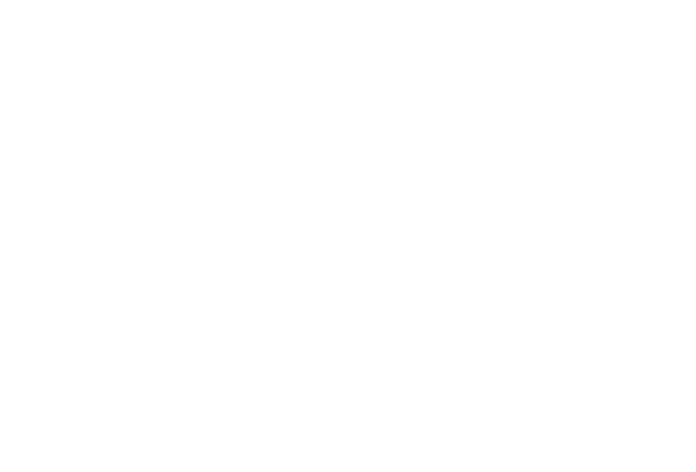

In [3]:
c1 = ROOT.TCanvas("c1")
masshist = ROOT.TH1F("masshist", "Histogram of L_{c}^{+} mass", 300, 2200, 2600)
masshist.GetXaxis().SetTitle("M(L_{c}^{+}) [MeV/c^{2}]")
masshist.GetYaxis().SetTitle("Number of events")
c1.Update()
c1.Draw()

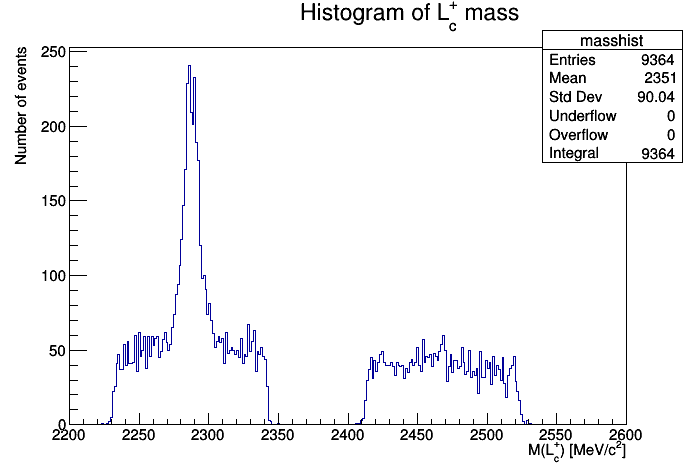

In [4]:
tree.Draw("lcplus_MM>>masshist(" + str(300) + "," + str(2200) + "," + str(2600) + ")")
masshist = ROOT.gDirectory.Get("masshist")
ROOT.gStyle.SetOptStat(1111111)
masshist.SetTitle("Histogram of L_{c}^{+} mass")
masshist.GetXaxis().SetTitle("M(L_{c}^{+}) [MeV/c^{2}]")
masshist.GetYaxis().SetTitle("Number of events")
c1.Update()
c1.Draw()

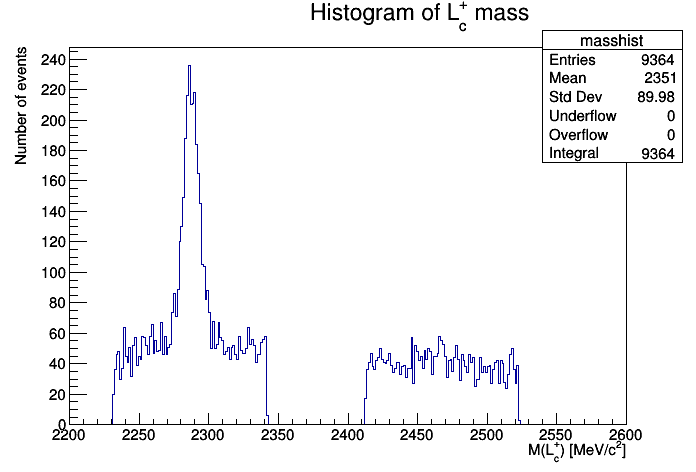

In [5]:
tree.Draw("lcplus_M>>masshist(" + str(300) + "," + str(2200) + "," + str(2600) + ")")
masshist = ROOT.gDirectory.Get("masshist")
ROOT.gStyle.SetOptStat(1111111)
masshist.SetTitle("Histogram of L_{c}^{+} mass")
masshist.GetXaxis().SetTitle("M(L_{c}^{+}) [MeV/c^{2}]")
masshist.GetYaxis().SetTitle("Number of events")
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TFile::Append>: Replacing existing TH1: Pmasshist (Potential memory leak).


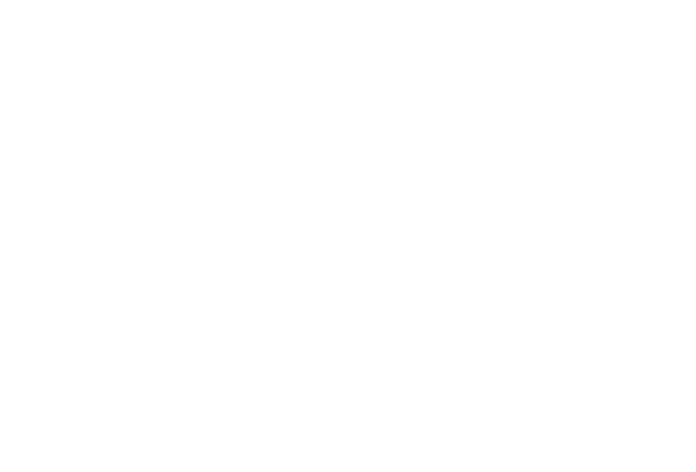

In [9]:
c2 = ROOT.TCanvas("c2")
PPIDKhist = ROOT.TH1F("Pmasshist", "Histogram of proton PIDK", 300, -50, 50)
PPIDKhist.GetXaxis().SetTitle("likelihood")
PPIDKhist.GetYaxis().SetTitle("Number of events")
c2.Update()
c2.Draw()

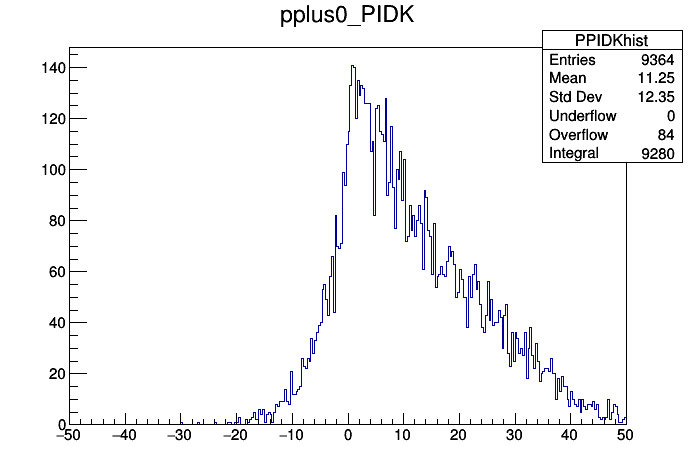

In [10]:
tree.Draw("pplus0_PIDK>>PPIDKhist(" + str(300) + "," + str(-50) + "," + str(50) + ")")
Pmasshist = ROOT.gDirectory.Get("PPIDKhist")
PPIDKhist.GetXaxis().SetTitle("likelihood")
PPIDKhist.GetYaxis().SetTitle("Number of events")
ROOT.gStyle.SetOptStat(1111111)

c2.Update()
c2.Draw()

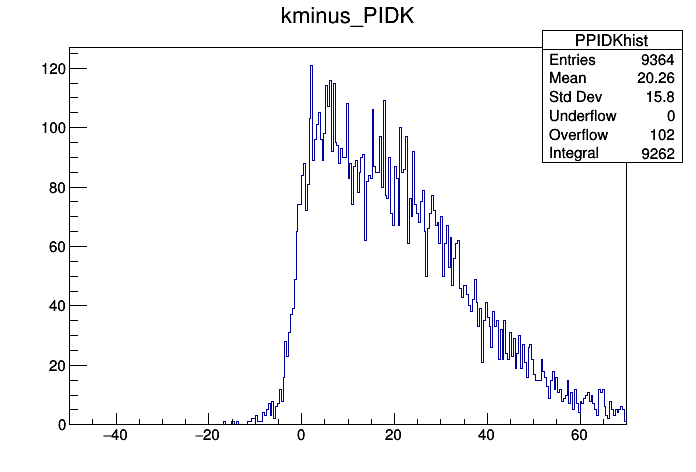

In [18]:
tree.Draw("kminus_PIDK>>PPIDKhist(" + str(300) + "," + str(-50) + "," + str(70) + ")")
Pmasshist = ROOT.gDirectory.Get("PPIDKhist")

c2.Update()
c2.Draw()

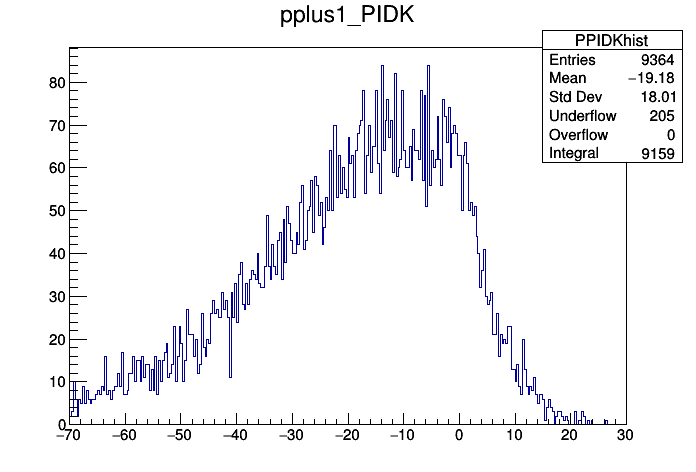

In [20]:
tree.Draw("pplus1_PIDK>>PPIDKhist(" + str(300) + "," + str(-70) + "," + str(30) + ")")
Pmasshist = ROOT.gDirectory.Get("PPIDKhist")

c2.Update()
c2.Draw()

Plotting comparison in lcplus_MM between trees Decay Tree and Decay Tree
- Using cuts1: 1==1
- Using cuts2: 1==1


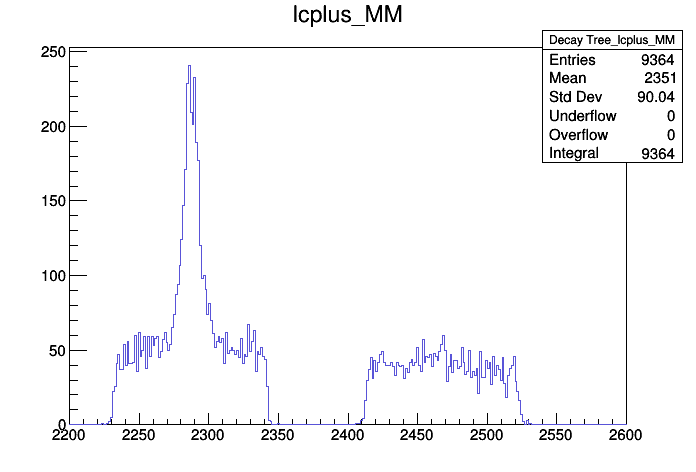

In [7]:
def plot_comparison(varname, xmin, xmax, 
    tree1=tree, tree2=tree, bins=300, cuts1 = "1==1", cuts2 = "1==1", 
    extralabel1="", extralabel2="", normalized=True, legendLocation="Right") :
    
  # varname, xmin, xmax are the variable to compare, and min and max range.
  # Default is to compare MC to data, but you can set tree1 and tree2, as well as cuts on them.
  # Furthermore, let's add extra labels if we add cuts, make an option to draw the normalized distributions,
  # and change the location of the legend to "Left" or "Right" if it gets in the way.
 
  print("Plotting comparison in {0} between trees {1} and {2}".format(varname, tree1.GetName(), tree2.GetName()))
  print("- Using cuts1: {0}".format(cuts1))
  print("- Using cuts2: {0}".format(cuts2))

  # set the names
  name1 = tree1.GetName() + str(extralabel1)
  name2 = tree2.GetName() + str(extralabel2)

  # draw the histograms with cuts
  tree1.Draw(varname+">>"+name1+"_"+varname+"("+str(bins)+","+str(xmin)+","+str(xmax)+")", cuts1)
  tree2.Draw(varname+">>"+name2+"_"+varname+"("+str(bins)+","+str(xmin)+","+str(xmax)+")", cuts2)
  hist1 = ROOT.gDirectory.Get(name1+"_"+varname)
  hist2 = ROOT.gDirectory.Get(name2+"_"+varname)
    
  # make fancy
  hist1.SetTitle(varname)
  #hist1.GetXaxis().SetTitle(varname)
  hist1.SetLineColor(2) # red for Unchanged data
  hist1.SetLineWidth(1) 
  hist2.SetTitle(varname)
  #hist2.GetXaxis().SetTitle(varname)
  hist2.SetLineColor(9) # blue for cut Data
  hist2.SetLineWidth(1) 
  #hist1.SetAxisRange(0, 10, "Y")
  #hist2.SetAxisRange(0, 10, "Y")

  # allow normalized drawing
  if(normalized) :
    hist2.DrawNormalized()
    hist1.DrawNormalized("same")
  else :
    hist2.Draw()
    hist1.Draw("same")

  # add a legend
  leg = ROOT.TLegend(0.11,0.77,0.3,0.89) # borders size, fill color, font, text size
  if(legendLocation=="Right") :
    leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
  leg.AddEntry(hist1, name1, "l") #add text to the legend
  leg.AddEntry(hist2, name2, "l")
  leg.Draw("same")

  # draw
  c1.Update()
  c1.Draw()

  return 

plot_comparison("lcplus_MM",2200,2600, normalized=False)

Plotting comparison in lcplus_MM between trees Decay Tree and Decay Tree
- Using cuts1: 1==1
- Using cuts2: pplus1_PIDK < 0 && pplus1_PIDK < 5


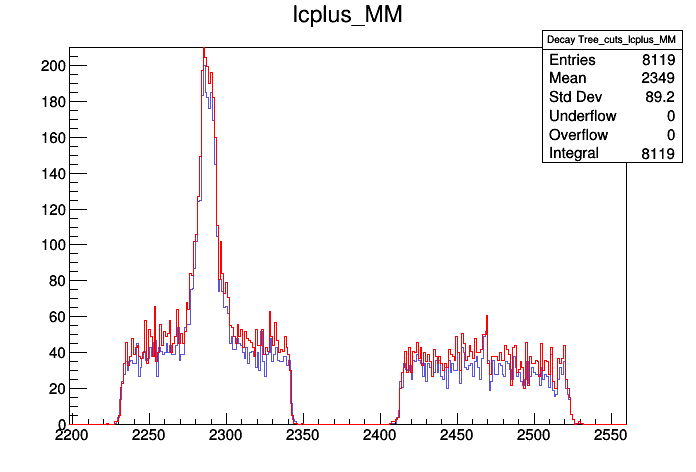

In [16]:

#DataCuts = "pplus1_PIDK < 5"
#DataCuts = "kminus_PIDK > 0"
DataCuts = "pplus1_PIDK < 0 && pplus1_PIDK < 5"
#DataCuts = "1==1"
# masshist2 = ROOT.TH1F("masshist", "Histogram of L_{c}^{+} mass", 300, 2200, 2600)
# tree.Draw("lcplus_MM>>masshist(" + str(300) + "," + str(2200) + "," + str(2600) + ")")
# #masshist = ROOT.gDirectory.Get("masshist")
# masshist.Draw()
# tree.Draw("lcplus_MM>>masshist2(" + str(300) + "," + str(2200) + "," + str(2600) + ")", DataCuts)
# #masshist2 = ROOT.gDirectory.Get("masshist2")
# #masshist2.SetLineColor(5)
# #masshist2.Draw("same")
plot_comparison("lcplus_MM", 22000, 2600, 
    tree1=tree, tree2=tree, cuts1="1==1", cuts2=DataCuts, extralabel1="_nocuts", extralabel2="_cuts", 
    normalized=False, legendLocation="Right")
c1.Update()
c1.Draw()

Plotting comparison in lcplus_M between trees Decay Tree and Decay Tree
- Using cuts1: 1==1
- Using cuts2: pplus1_PIDK < 0 && pplus1_PIDK < 5


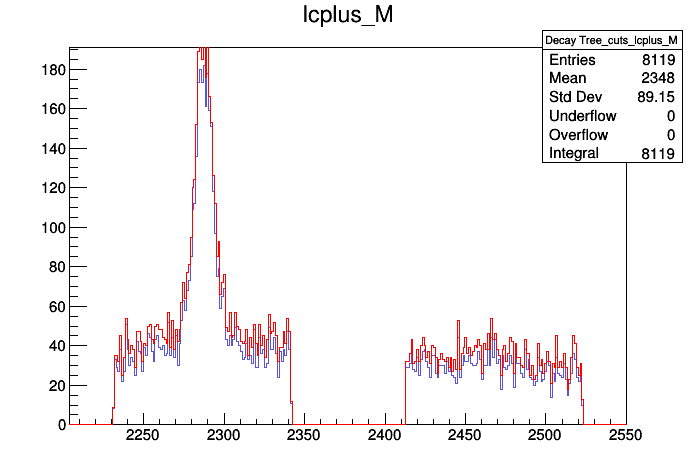

In [9]:
DataCuts = "pplus1_PIDK < 0 && pplus1_PIDK < 5"
plot_comparison("lcplus_M", 22000, 2600, 
    tree1=tree, tree2=tree, cuts1="1==1", cuts2=DataCuts, extralabel1="_nocuts", extralabel2="_cuts", 
    normalized=False, legendLocation="Right")
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Warning in <TFile::Append>: Replacing existing TH1: Lifetimehist (Potential memory leak).


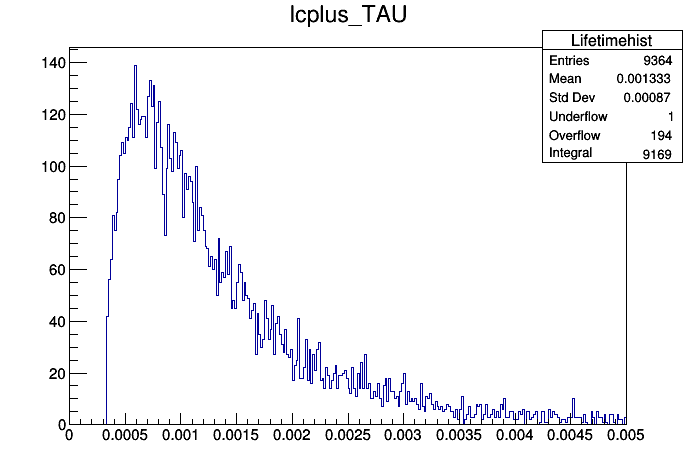

In [33]:
c3 = ROOT.TCanvas("c3")
Lifetimehist = ROOT.TH1F ("Lifetimehist", "Histogram of Lc lifetime", 300, 0, 0.005)
Lifetimehist.GetXaxis().SetTitle("Lifetime[ns]")
Lifetimehist.GetYaxis().SetTitle("Number of events")

tree.Draw("lcplus_TAU>>Lifetimehist(" + str(300) + "," + str(0) + "," + str(0.005) + ")")
Pmasshist = ROOT.gDirectory.Get("Lifetimehist")
ROOT.gStyle.SetOptStat(1111111)

c3.Update()
c3.Draw()
